# Model project - Externalities and Pigou taxes

Our model project consists of a microeconomic model describing the inefficiencies of pollution from production from a social economic point of view. We introduce a demand and a supply function, but the production of the suppliers is associated with a negative externality cost.

We apply model analysis methods to find the market and social equlibria output and prices, where we include graphs to illustrate these equlibria. As a method to solve this social inefficiency from the market powers, we introduce a Pigou tax and calculate the optimal size of this.

**Setup**

In [1]:
#Importing the relevant packages
from mpmath import mp
import sympy as sm
from sympy import *
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import ipywidgets as widgets
from ipywidgets import interact, fixed

sm.init_printing(use_unicode=True) #This code enables pretty printing for the mathematical symbols we will use

In [2]:
#Defining the relevant variables and parameters from our model with the sympy symbols function
xd = sm.symbols('x_d') #The amount of goods demanded by consumers
xs = sm.symbols('x_s') #The amount of goods supplied by suppliers
A = sm.symbols('A') #The price consumers are willing to pay if they can only get an infinitely small amount of goods (assumed declining willingess to pay)
B = sm.symbols('B') #The price the suppliers are willing to sell for if they can only sell an infinitely small amount of goods
p = sm.symbols('p') #The price of goods
alpha = sm.symbols('alpha') #A measure of the consumers' sensitivity to changes in prices
beta = sm.symbols('beta') #A measure of the suppliers' sensitivity to changes in prices
delta = sm.symbols('\delta') #An abritrarily chosen multiplier that creates the negative externality through production
x = sm.symbols('x') #The quantity of the goods traded
xc = sm.symbols('xc') #Used for plotting x
deltax = sm.symbols('deltax') #Used for plotting delta


In [3]:
#Checking whether the variables and parameters are correctly defined
xd, xs, A, B, p, alpha, beta, delta, x

**The Model**

To set up our model, we firstly introduce the following demand and supply functions from the consumers and suppliers of the economy respectively including the negative externality function. It is a simple economy-setup with only one representative consumer, one representative supplier and a single type of good. The agents seek to trade based on the following equations. The producers and the consumers does not care about the negative externality and therefore this doesn't impact their trading behaviour. The equations are as follows:

Demand: $x_{d}=\frac{A-p}{a}$

Supply: $x_{s}=\frac{B+p}{\beta}$

Negative externality: $C_E(x)=(\delta x)^2$

Firstly, we define the demand and supply as follows:

In [4]:
demand = (A-p)/alpha
supply = (B+p)/beta
externality = (delta*x)**2
demand, supply, externality #Prints the three definitions

Firstly, from the demand and supply functions we can calculate the market price for the good by setting the two equal to each other and solving for $p$. This yields:

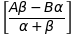

In [5]:
#Setting demand and supply equal to each other and solving for p
Marketprice = sm.solve(sm.Eq(demand,supply),p) #We use the sympy .Eq function to set the two equal to each other
#and use the sympy solve function to solve for p in this equation. 
Marketprice 

From this result we see that the price - intuitively - is positively dependent on the consumers' initial valuation of the goods and negatively of the producers' initial valuation. This result can be inserted in either the demand or the supply function to obtain the amount of traded goods in equilibrium where supply equals demand. 

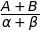

In [6]:
#Finding the equilibrium output by inserting the marketprice into the demand function
Marketoutput = demand.subs(p, Marketprice[0])
#We use the .subs method to insert the marketprice result from before instead of p in the demand function. 
#As the marketprice expression is defined as a list-type, we include the index [0] to refer to the expression herein.
sm.simplify(Marketoutput) #This function simplifies the marketoutput expression. 

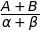

In [7]:
#We can check whether we get the same result by inserting the market price equilibrium into the supply function
CheckMarketoutput = supply.subs(p, Marketprice[0]) #Same calculation procedure as in code cell above. 
sm.simplify(CheckMarketoutput)

Luckily, we find that the two results are identical, which shows that the found price should be correct. 
From the marketoutput expression we once again see, that more goods are traded if consumers are willing to pay high prices for initial goods (through A) and suppliers are willing to supply them cheaply (through B). We also see that it depends negatively on the price sensitiviy of both the agents. 

Unfortunately, the production from the suppliers also create a negative externality due to pollution or some other externality. This is assumed to have a convex negative impact on society. This convex function can be seen from the graphical depiction below, where we as an example have set $\delta=1$.

<function matplotlib.pyplot.show(*args, **kw)>

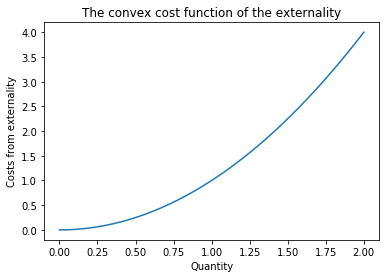

In [12]:
#We impose an externality cost of production due to emission
ExternalityCost = (delta*xc)**2
delta = 1
np.linspace(0,2)
plt.plot(xc,ExternalityCost)
plt.xlabel("Quantity")
plt.ylabel("Costs from externality")
plt.title("The convex cost function of the externality")
plt.show

In order to, find the social optimal quantity produces and the associated price, we start by calculating the marginal cost of the externality below. From this the convex nature of the externality is once again evident. We get:

In [13]:
#Finding the marginal externality cost by differentiating w.r.t. x
MarginalExternalityCost = sm.diff(externality, x) #Using the sympy function "diff" to differentiate externality wrt.x
MarginalExternalityCost #Printing the result

We now also need to find the inverse supply function, which shall be added to the marginal externality cost to give us the social marginal cost of production. 

In [14]:
#Private marginal cost (the inverse supply function)
PrivateMarginalCost = sm.solve(sm.Eq(supply,x),p) #We set the supply expression equal to x and solve for p. 
PrivateMarginalCost

In [15]:
#Social marginal cost is the sum of the private marginal cost and the marginal externality cost
SocialMarginalCost = PrivateMarginalCost[0] + MarginalExternalityCost
SocialMarginalCost

Seen above is the social marginal cost function, which takes the negative effects of the externality into account and adds it to the supply function. As $\delta>0$, the social marginal cost will be larger than the private cost from the suppliers. The social marginal cost curve will thus have a steeper slope than the supply curve.
To now finally find the socially optimal amount of traded goods and the associated price, we start by finding the inverse demand function:

In [16]:
#Inverse demand curve
InverseDemand = sm.solve(sm.Eq(demand,x),p)
InverseDemand

And we now set this inverse demand function equal to the social marginal cost and solve for x to find the optimal amount of traded goods:

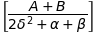

In [17]:
#Finding the social optimal output by setting the demand function equal to the social marginal cost
SocialOptimal = sm.solve(sm.Eq(InverseDemand[0], SocialMarginalCost), x)
SocialOptimal

Now to finally find the optimal price, we insert this expression into the demand function:

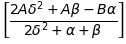

In [18]:
SocialOptimalPrice = sm.solve(sm.Eq(demand,SocialOptimal[0]),p)
SocialOptimalPrice

Which is the optimal price when considering the externality. 

**Graphing the economy**

To give a graphical overview of the economy, we plot a graph below, where it is possible to change the value of the parameter $\delta$ to give an insight in how the social cost and thereby the optimum depend greatly on this parameter. 

In [19]:
def PlotGraph(A, alpha, beta, B, delta): 
    #This function is able to plot the graphs of the demand, supply and SMC-functions with different parameter values.
    
    x = np.linspace(0,200) #Here we choose over which span the x quantity runs in the graph.
    d = A-alpha*x #Defining the demand function 
    s = beta*x-B #Defining the supply function
    smc = x*(beta+2*delta**2)-B #Defining the social marginal cost function
        
    plt.xlabel("Quantity") #Labelling x-axis
    plt.ylabel("Price") #Labelling y-axis
    plt.grid() #Putting a grid in the background of the graph
    plt.title('Supply, demand and social marginal cost') #Adding title to graph
    plt.plot(x, d, label='D') #Plotting and labelling demand function  
    plt.plot(x, s, label='S') #Plotting and labelling supply function  
    plt.plot(x, smc, label='SMC') #Plotting and labelling SMC function  
    plt.legend(loc='upper right') #Choosing to put label names in upper right corner.


In [20]:
widgets.interact(PlotGraph,A=widgets.fixed(800), alpha=widgets.fixed(4), 
                 delta=widgets.FloatSlider(description="$\delta$", min=0.0, max=2 , step=0.05, value=1),
                 B=widgets.fixed(0), beta=widgets.fixed(2))
#These lines of code use the graphing function "PlotGraph" and adds a Floatslider, so the user can adjust
#the value of the delta parameter. 

interactive(children=(FloatSlider(value=1.0, description='$\\delta$', max=2.0, step=0.05), Output()), _dom_cla…

<function __main__.PlotGraph(A, alpha, beta, B, delta)>

From this graph we clearly see that when $\delta$ increases the socially optimal price also increases and thereby the quantity traded will be reduced. When $\delta$ on the other hand reaches zero, the SMC and supply curve will be identical - so in the lack of externalities the social optimum will also be the market optimum. 

In this example, when externalities are present this is however not the case as neither the consumers nor the producers cares about the externality. To take this into account and reach the social optimum, we will now look at the effects of introducing a Pigou tax. 

**Pigou taxes**

A Pigou tax is a tax that aims at correcting ineffecient market outcomes as with the current example. The tax will aim at increasing the price level of the specific good with the externality and thus, hopefully, affect the trading behaviour so the externality is reduced optimally. The optimal size of the Pigouvian tax is the difference between what the consumers are willing to pay and what the suppliers are willing to sell their goods for at the socially optimal traded quantity.

We have already found the price level for the consumers in the social optimum, and now only need to find the price at which the suppliers are willing to sell at the social optimum. These to prices are:

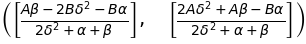

In [21]:
#Inserting the social optimal output into the supply function
SocialOptimalSupply = sm.solve(sm.Eq(SocialOptimal[0], supply), p)
SocialOptimalSupply,SocialOptimalPrice

And now we simply subtract the two from each other to get:

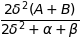

In [22]:
#The optimal pigou tax is the difference between the demand and supply
PigouTax = SocialOptimalPrice[0] - SocialOptimalSupply[0]
sm.simplify(PigouTax)

Which is then the optimal size of the Pigouvian tax, that can bring the two agents of the economy to trade the desired level of goods from a social point of view. We will quickly have a graphical look at how the size of this tax is affected by the size of $\delta$ as this is not necessarily clear from the expression above:

<function matplotlib.pyplot.show(*args, **kw)>

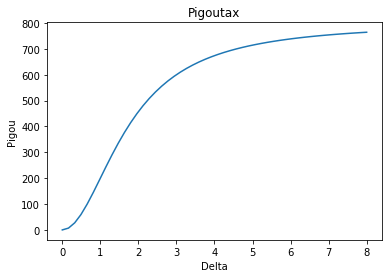

In [23]:
#First we choose the parameter values for the graphing example below
A = 800 
B = 0
alpha = 4
beta = 2

deltax = np.linspace(0,8) #Choosing the span in which delta should be plotted on the graph

Pigoutax = (2*deltax**2*(A+B))/(2*deltax**2+alpha+beta) #Defining the function for the Pigouvian tax

plt.plot(deltax,Pigoutax) #Plotting the graph and adding labels and titles. 
plt.xlabel("Delta")
plt.ylabel("Pigou")
plt.title("Pigoutax")
plt.show

As before we have arbitrarily set the parameter values - specifically $A=800, B=0, \alpha=4$ and $\beta=2$. We see that as $\delta$ increases so does the optimal size of the Pigouvian tax. The optimal size is concave wrt. the size of $\delta$ and converges towards the size of A, which is the highest possible amount a consumer will be willing to pay for an infinitely small amount of goods. 


**Conclusion**

This model project has showed us how the presence of externalities in a market can cause differences between the market optimum and the social optimum. The larger the externality cost, the larger the difference between these two optimums will be. This is a very relevant insight as many parts of the real world economy are faced with similar issues, where many agents' behavior and incentives contradicts with what the society desires as a whole.

In the final part of the project, we introduced an instrument to fix potential market inefficiencies and lead the agents in the market towards the social optimum of goods traded. Of course this is a simple microeconomic setup, and in the real world it is impossible to identify the optimal size of the Pigouvian tax, as the exact desires and incentives from the agents of the economy are unknown. However, this tax is an effective way to reduce market inefficiencies, though it is impossible to get rid of all of them.